$$
\Large \textbf{Problema 01}
$$

<div style="text-align: justify">
Calcule las frecuencias naturales de oscilación transversal de una barra de acero (densidad $7850\:\frac{kg}{m^3}$ y módulo de elasticidad $210\:GPa$), de $1\:m$ de longitud, $10\:{cm}^2$ de área, momento de inercia de $10\:{cm}^4$. Realice el cálculo para un número variable de elementos y estudie la convergencia de sus resultados. Haga el cálculo para matrices de masa concentrada y consistente. Grafique los desplazamientos en función de la posición para los primeros modos 
normales.
</div>

<center><img src="ImgProb01.png"></center>

***

In [1]:
import mef
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 7))
plt.rc('font', size=14)
from scipy import linalg
import math

## Datos del problema

In [2]:
rho = 7850   # kg/m^3
E = 210e9    # Pa
L = 1        # m
A = 0.001    # m^2
I = 1e-7     # m^4

In [3]:
Ne = 50
glxn = 2
dimension_el = 1

In [4]:
dL = L/Ne

## Matriz K

In [5]:
MN = np.array([(i*dL, 0, 0) for i in range(Ne+1)])
MC = np.array([(i, i+1) for i in range(Ne)])
Nn = MN.shape[0]
Nnxe = MC.shape[1]

In [6]:
Ke = (E*I/dL**3)*np.array([[12, 6*dL, -12, 6*dL],
                           [6*dL, 4*(dL**2), -6*dL, 2*(dL**2)],
                           [-12, -6*dL, 12, -6*dL],
                           [6*dL, 2*(dL**2), -6*dL, 4*(dL**2)]])
K = mef.Kglobal_desdeKe(MN, MC, Ke, glxn)

In [7]:
s = np.array([0, 1])
r = np.array([i for i in range(glxn*(Ne+1)) if i not in s])

## Masa consistente

In [8]:
Me = (rho*A*dL/420)*np.array([[156, 22*dL, 54, -13*dL],
                              [22*dL, 4*dL**2, 13*dL, -3*dL**2],
                              [54, 13*dL, 156, -22*dL],
                              [-13*dL, -3*dL**2, -22*dL, 4*dL**2]])
M = mef.Kglobal_desdeKe(MN, MC, Me, glxn)

Para estudiar los modos normales de vibración:
$$ ([K]-\omega^2 [M])\{u\}=0 $$

In [9]:
om2, V = linalg.eigh(K[np.ix_(r, r)], M[np.ix_(r, r)])
f = np.sqrt(om2)/(2*np.pi)
# 'om_2' = valores de los modos normales
# 'V'    = desplazamientos y ángulos de los modos normales
# 'f'    = frecuencia de los modos normales

In [10]:
V_c = np.vstack((np.zeros([len(s), len(om2)]), V))
# Interesan los primeros 4 o 5 modos, los siguientes alcanzan muy altas frecuencias.

In [11]:
d = V_c[0::2, :]
d = d/d[-1, :]

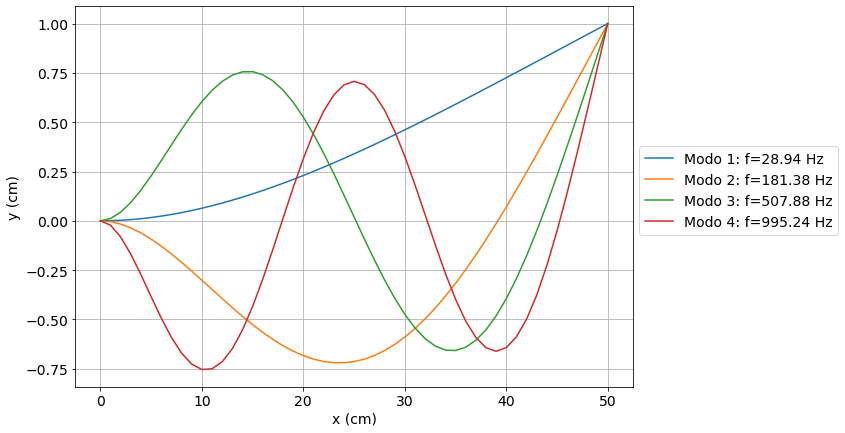

In [12]:
for i in range(4):
    plt.plot(np.arange(Nn), d[:, i], label='Modo '+str(i+1)+': f='+str(round(f[i], 2))+' Hz')
plt.legend(bbox_to_anchor=(1.38, 0.65))
plt.grid()
plt.ylabel('y (cm)')
plt.xlabel('x (cm)')
plt.show()

## Masa concentrada

In [13]:
Me_c = (rho*A*dL/24)*np.array([[12, 0, 0, 0],
                               [0, dL**2, 0, 0],
                               [0, 0, 12, 0],
                               [0, 0, 0, dL**2]])
M_c = mef.Kglobal_desdeKe(MN, MC, Me_c, glxn)

In [14]:
om2_c, V_c = linalg.eigh(K[np.ix_(r, r)], M_c[np.ix_(r, r)])
f_c = np.sqrt(om2_c)/(2*np.pi)

In [15]:
V_c_c = np.vstack([np.zeros((len(s), len(om2_c))), V_c])
d_c = V_c_c[0::2, :]
d_c = d_c/d_c[-1, :]

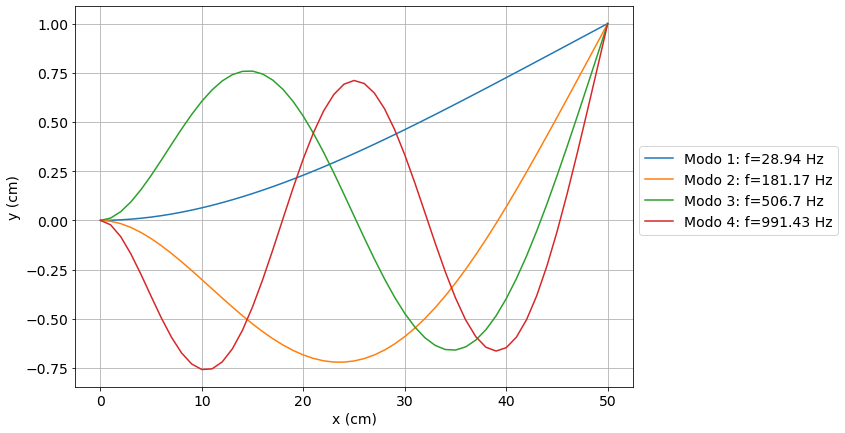

In [16]:
for i in range(4):
    plt.plot(np.arange(Nn), d_c[:, i], label='Modo '+str(i+1)+': f='+str(round(f_c[i], 2))+' Hz')
plt.legend(bbox_to_anchor=(1.38, 0.65))
plt.grid()
plt.ylabel('y (cm)')
plt.xlabel('x (cm)')
plt.show()

## Comparación

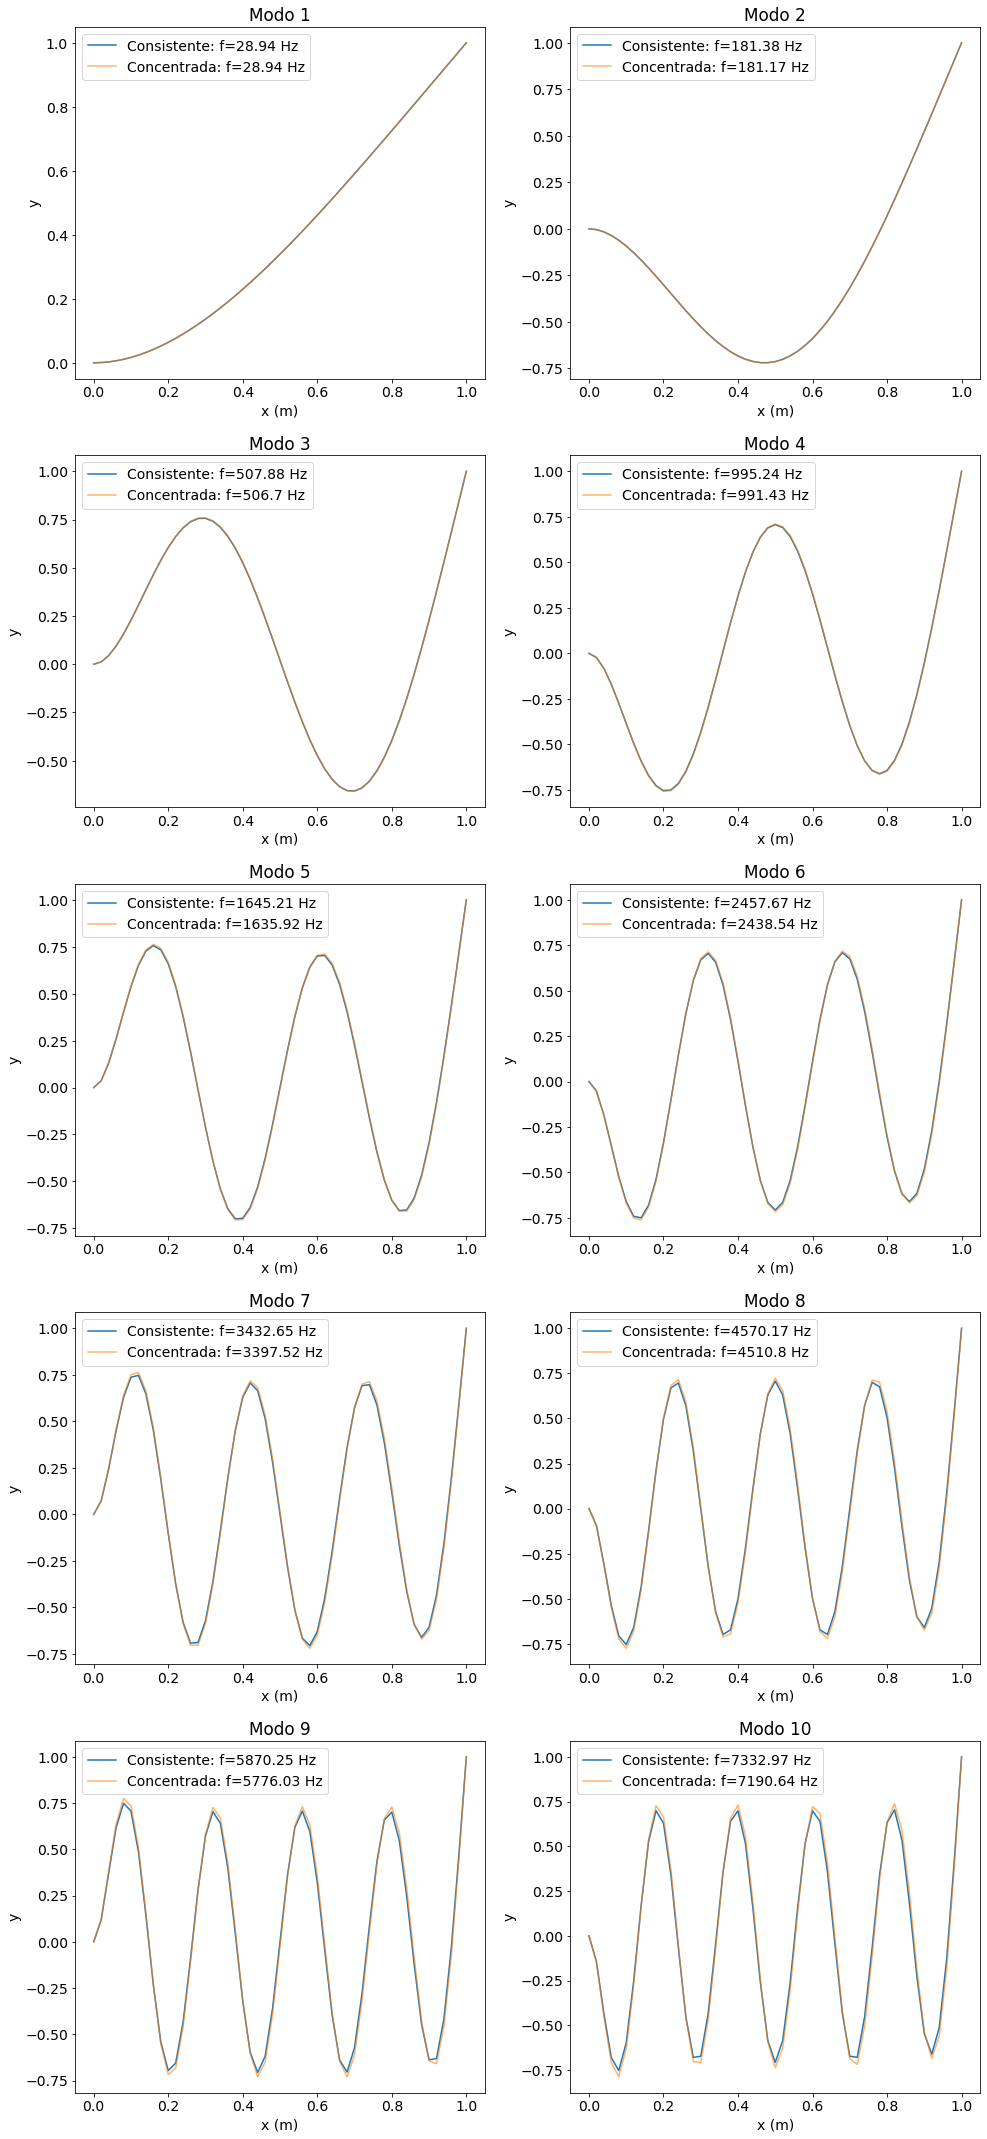

In [17]:
plt.rc('figure', figsize=(14, 30))
fig = plt.figure()
fig.clf()
ax = fig.subplots(5, 2)
for i in range(10):
    a1 = math.floor(i/2)
    a2 = i % 2
    ax[a1, a2].plot(np.arange(Nn)*dL, d[:, i], '-', label='Consistente: f='+str(round(f[i], 2))+' Hz')
    ax[a1, a2].plot(np.arange(Nn)*dL, d_c[:, i], '-', label='Concentrada: f='+str(round(f_c[i], 2))+' Hz', alpha=0.6)
    ax[a1, a2].set_ylabel('y')
    ax[a1, a2].set_xlabel('x (m)')
    ax[a1, a2].set_title('Modo '+str(i+1))
    ax[a1, a2].legend()
fig.tight_layout(pad=1.25)

In [18]:
x = np.linspace(1, len(f), len(f))
y = []
for i in range(len(f)):
    y.append(abs(f[i]-f_c[i])/f[i]*100)

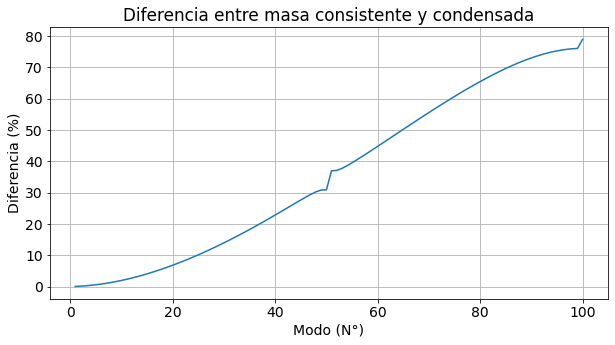

In [19]:
plt.rc('figure', figsize=(10, 5))
plt.plot(x, y)
plt.grid()
plt.ylabel('Diferencia (%)')
plt.xlabel('Modo (N°)')
plt.title('Diferencia entre masa consistente y condensada')
plt.show()

## Estudio de la convergencia
Tengo que hacer esta parte. Subo el TP porque ya estoy sobre el tiempo de entrega y no llegué a hacerla.

<div style="background:#999900">no te hagas problema, te comento nomas la idea:</div>

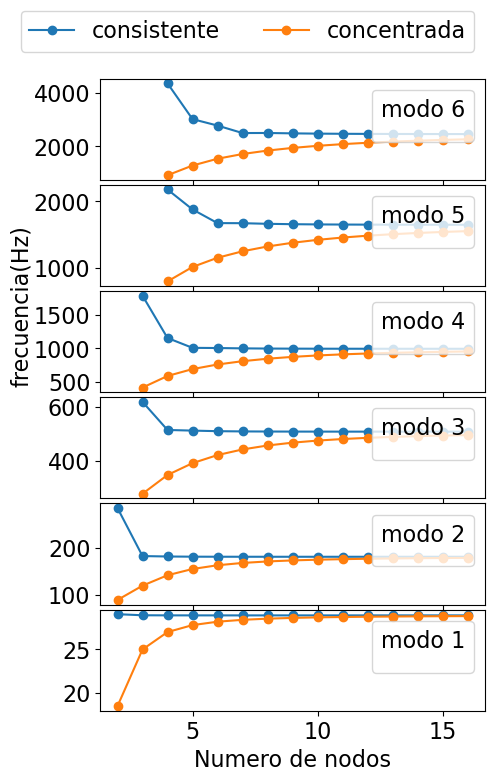

In [21]:
from IPython.display import Image
from IPython.core.display import HTML
path='../../../../EjemplosEnClase/Guia4/FrecuanciavsN.png'
Image(path)